### Install dependencies

In [1]:
from jupyter_dash import JupyterDash
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import app as app_file
import setup as setup_file
import dash_core_components as dcc
import pickle
from configuration import Config
from statistics import Statistics

### Serve Jupyter Dash

In [ ]:
JupyterDash.infer_jupyter_proxy_config()

### Define your static parameters

In [3]:
configs = Config()
setup_applet = setup_file.create_app(configs)
setup_applet.run_server(mode='inline')

### View your sample population

In [5]:
sample_pop = configs.params['enc_type'].initialize()
print(sample_pop)

[{'gene': array([6, 3, 7, 4, 1, 0, 2, 5]), 'fitness': array([0]), 'meta': {}}
 {'gene': array([3, 4, 7, 2, 5, 1, 6, 0]), 'fitness': array([0]), 'meta': {}}
 {'gene': array([7, 4, 2, 6, 3, 1, 5, 0]), 'fitness': array([0]), 'meta': {}}
 {'gene': array([5, 7, 4, 6, 2, 1, 0, 3]), 'fitness': array([0]), 'meta': {}}
 {'gene': array([0, 1, 5, 3, 4, 2, 6, 7]), 'fitness': array([0]), 'meta': {}}]


### Define a custom evaluation function

Your evaluation function should update all fitness values of an individual. The evaluation functions for the predefined problems can be found in ```evaluate.py```



In [6]:
def custom_eval(self, pop):
    return pop

configs.params['eval_type'] = cust_eval

In [6]:
sample_pop = configs.params['eval_type'](configs, sample_pop)
print(sample_pop[0])

{'gene': array([7, 3, 6, 1, 5, 0, 4, 2]), 'fitness': array([4]), 'meta': {}}


### Define a custom visualization

Your visualization should be a graphical phenotype representation of an individual. Visualization functions for the predefined problems can be found in ```visualize.py```


In [7]:
def cust_vis(ind):
    return go.Figure()
configs.params['cust_vis'] = cust_vis

### Run the application

In [5]:
stats = Statistics(configs.params)
main_app = app_file.create_app(configs, stats)
main_app.run_server()

Dash app running on http://127.0.0.1:8050/


In [6]:
self, ind = configs, sample_pop[0]

In [7]:
import base64

raw_board = 'board.png' # replace with your own image
encoded_board = base64.b64encode(open(raw_board, 'rb').read())

raw_queen = 'queen.png' # replace with your own image
encoded_queen = base64.b64encode(open(raw_queen, 'rb').read())

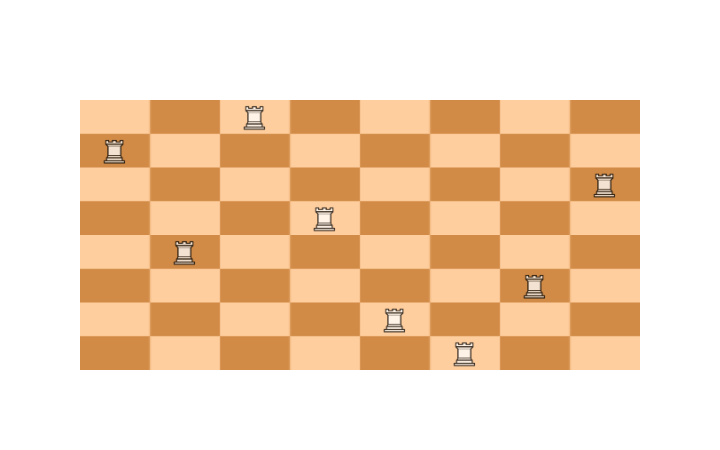

In [11]:
fig = go.Figure()

fig.update_yaxes(range=(0, 8), visible=False)
fig.update_xaxes(range=(0, 8), visible=False)
fig.update_layout()
fig.add_layout_image(
        dict(
            source='data:image/png;base64,{}'.format(encoded_board.decode()),
            xref="x",
            yref="y",
            x=0,
            y=8,
            sizex=8,
            sizey=8,
            sizing="stretch",
            opacity=1,
            layer="below")
)

for i in range(self.params['gene_size']):
    fig.add_layout_image(
        dict(
            source='data:image/png;base64,{}'.format(encoded_queen.decode()),
            xref="x",
            yref="y",
            x=i + .25,
            y=ind['gene'][i] + 1,
            sizex=1,
            sizey=1,
            opacity=0.75,
            layer="below")
    )

fig